<a href="https://colab.research.google.com/github/RahulSahu7981/Sky_Airline_Hack2.0/blob/main/SkyAirline_HACK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the CSV files into DataFrames
customer_data = pd.read_csv('/content/drive/MyDrive/DATASETS/AIRLINES_HACK/customer_data.csv')
call_reason = pd.read_csv('/content/drive/MyDrive/DATASETS/AIRLINES_HACK/call_reason.csv')
# The error likely stems from improperly formatted strings in the 'call_deatils.csv' file.
# Using the 'error_bad_lines=False' argument will skip lines that cause parsing errors.
# Alternatively, you can investigate and fix the formatting issues in your CSV file directly.
call_details = pd.read_csv('/content/drive/MyDrive/DATASETS/AIRLINES_HACK/call_deatils.csv', on_bad_lines='skip')
sentiment = pd.read_csv('/content/drive/MyDrive/DATASETS/AIRLINES_HACK/sentiment.csv')

# Let's check the first few rows of each dataset to understand their structure
print(customer_data.head())
print(call_reason.head())
print(call_details.head())
print(sentiment.head())

   customer_id      customer_name  elite_level_code
0   2033123310     Matthew Foster               4.0
1   8186702651      Tammy Walters               NaN
2   2416856629      Jeffery Dixon               NaN
3   1154544516      David Wilkins               2.0
4   5214456437  Elizabeth Daniels               0.0
      call_id primary_call_reason
0  4667960400   Voluntary  Cancel
1  1122072124             Booking
2  6834291559              IRROPS
3  2266439882             Upgrade
4  1211603231             Seating
      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06    

In [ ]:
print(customer_data.isnull().sum())

customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64


In [ ]:
customer_data = customer_data[customer_data['elite_level_code'].notna()]

In [ ]:
print(customer_data.isnull().sum())

customer_id         0
customer_name       0
elite_level_code    0
dtype: int64


In [ ]:
# # Fill missing values in elite_level_code with "Unknown"
# customer_data['elite_level_code'].fillna('Unknown', inplace=True)

# # Verify that there are no missing values in elite_level_code
# print(customer_data['elite_level_code'].isnull().sum())

In [ ]:
# Check for missing data across all datasets
print(customer_data.isnull().sum())  # Check for missing values in customer_data
print(call_reason.isnull().sum())    # Check for missing values in call_reason
print(call_details.isnull().sum())   # Check for missing values in call_details
print(sentiment.isnull().sum())      # Check for missing values in sentiment

customer_id         0
customer_name       0
elite_level_code    0
dtype: int64
call_id                0
primary_call_reason    0
dtype: int64
call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64
call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64


In [ ]:
sentiment['agent_tone'].fillna('neutral', inplace=True)

<ipython-input-8-e34c206e8e66>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sentiment['agent_tone'].fillna('neutral', inplace=True)


In [ ]:
avg_sentiment_mean = sentiment['average_sentiment'].mean()
sentiment['average_sentiment'].fillna(avg_sentiment_mean, inplace=True)

<ipython-input-9-52aacb5f7cfd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sentiment['average_sentiment'].fillna(avg_sentiment_mean, inplace=True)


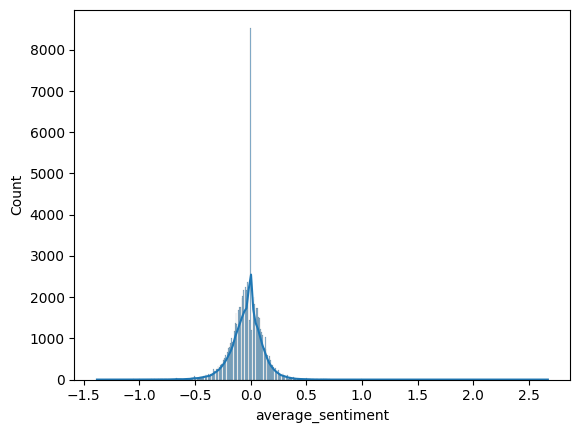

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of average_sentiment
sns.histplot(sentiment['average_sentiment'].dropna(), kde=True)
plt.show()

In [ ]:
def parse_mixed_datetime(date_str):
    # List of formats we know exist in the data
    possible_formats = ['%m/%d/%Y %H:%M', '%d-%m-%Y %H:%M']

    for fmt in possible_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except (ValueError, TypeError):
            continue
    # If none of the formats match, return NaT (Not a Time)
    return pd.NaT

# Apply this function to the datetime columns
call_details['call_start_datetime'] = call_details['call_start_datetime'].apply(parse_mixed_datetime)
call_details['agent_assigned_datetime'] = call_details['agent_assigned_datetime'].apply(parse_mixed_datetime)
call_details['call_end_datetime'] = call_details['call_end_datetime'].apply(parse_mixed_datetime)

# Verify the result
print(call_details[['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime']].head())

  call_start_datetime agent_assigned_datetime   call_end_datetime
0 2024-07-31 23:56:00     2024-08-01 00:03:00 2024-08-01 00:34:00
1 2024-08-01 00:03:00     2024-08-01 00:06:00 2024-08-01 00:18:00
2 2024-07-31 23:59:00     2024-08-01 00:07:00 2024-08-01 00:26:00
3 2024-08-01 00:05:00     2024-08-01 00:10:00 2024-08-01 00:17:00
4 2024-08-01 00:04:00     2024-08-01 00:14:00 2024-08-01 00:23:00


In [ ]:
# Verify the conversion
print(call_details.dtypes)

# Calculate Average Handle Time (AHT) and Average Speed to Answer (AST)
call_details['handle_time'] = (call_details['call_end_datetime'] - call_details['agent_assigned_datetime']).dt.total_seconds() / 60  # AHT in minutes
call_details['speed_to_answer'] = (call_details['agent_assigned_datetime'] - call_details['call_start_datetime']).dt.total_seconds() / 60  # AST in minutes

# Check if the handle_time and speed_to_answer columns were calculated correctly
print(call_details[['handle_time', 'speed_to_answer']].head())

call_id                             int64
customer_id                         int64
agent_id                            int64
call_start_datetime        datetime64[ns]
agent_assigned_datetime    datetime64[ns]
call_end_datetime          datetime64[ns]
call_transcript                    object
dtype: object
   handle_time  speed_to_answer
0         31.0              7.0
1         12.0              3.0
2         19.0              8.0
3          7.0              5.0
4          9.0             10.0


In [ ]:
mode_value = call_reason['primary_call_reason'].mode()[0]
call_reason['primary_call_reason'].fillna(mode_value, inplace=True)

<ipython-input-13-4e681d11a374>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  call_reason['primary_call_reason'].fillna(mode_value, inplace=True)


In [ ]:
# Merge call_details with customer_data on 'customer_id'
merged_data = pd.merge(call_details, customer_data, on='customer_id', how='left')

# Merge the above result with call_reason on 'call_id'
merged_data = pd.merge(merged_data, call_reason, on='call_id', how='left')

# Merge the result with sentiment data on 'call_id'
merged_data = pd.merge(merged_data, sentiment, on=['call_id', 'agent_id'], how='left')

# Check the merged dataset
print(merged_data.head())


      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript  handle_time  \
0  \n\nAgent: Thank you for calling United Airlin...         31.0   
1  \n\nAgent: Thank you for calling United Airlin...         12.0   
2  \n\nAgent: Thank you for calling United Airlin...         19.0   
3  \n\nAgent: Thank you for calling United Airlin...          7.0   

In [ ]:
# Remove records where AHT or AST is negative or zero
merged_data = merged_data[(merged_data['handle_time'] > 0) & (merged_data['speed_to_answer'] > 0)]

# Verify the cleaned data
print(merged_data[['handle_time', 'speed_to_answer']].describe())


        handle_time  speed_to_answer
count  70618.000000     70618.000000
mean      11.813574         7.282888
std       12.924170         2.517795
min        1.000000         3.000000
25%        4.000000         5.000000
50%        7.500000         7.000000
75%       15.000000         9.000000
max      119.000000        15.000000


In [ ]:
# Final check for any remaining missing values
print(merged_data.isnull().sum())

# Check for any anomalies in the key columns
print(merged_data[['handle_time', 'speed_to_answer', 'average_sentiment', 'silence_percent_average']].describe())


call_id                        0
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
handle_time                    0
speed_to_answer                0
customer_name              25325
elite_level_code           25325
primary_call_reason         5066
agent_tone                     0
customer_tone                  0
average_sentiment              0
silence_percent_average        0
dtype: int64
        handle_time  speed_to_answer  average_sentiment  \
count  70618.000000     70618.000000       70618.000000   
mean      11.813574         7.282888          -0.033023   
std       12.924170         2.517795           0.140884   
min        1.000000         3.000000          -1.380000   
25%        4.000000         5.000000          -0.110000   
50%        7.500000         7.000000          -0.020000   
75%       15.000000         9.000000          

In [ ]:
mode_value = merged_data['primary_call_reason'].mode()[0]
merged_data['primary_call_reason'].fillna(mode_value, inplace=True)

<ipython-input-17-847265b09908>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['primary_call_reason'].fillna(mode_value, inplace=True)
<ipython-input-17-847265b09908>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['primary_call_reason'].fillna(mode_value, inplace=True)


In [ ]:
print(merged_data.isnull().sum())

call_id                        0
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
handle_time                    0
speed_to_answer                0
customer_name              25325
elite_level_code           25325
primary_call_reason            0
agent_tone                     0
customer_tone                  0
average_sentiment              0
silence_percent_average        0
dtype: int64


STEP 2 : EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for better visualizations
%matplotlib inline


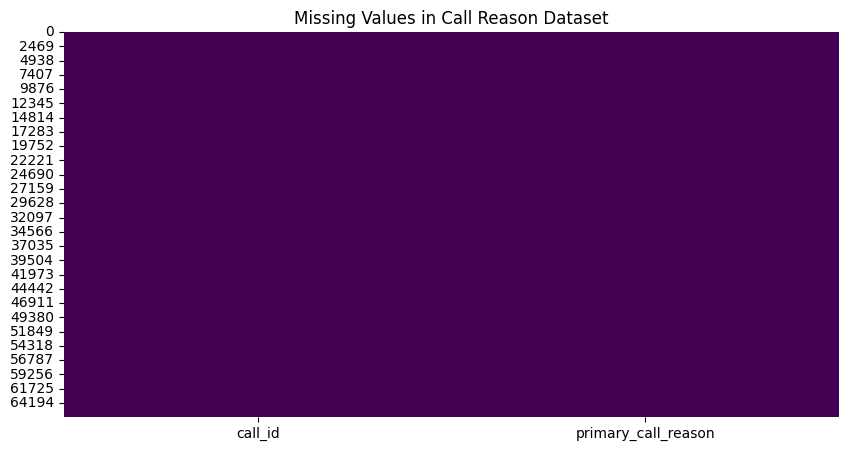

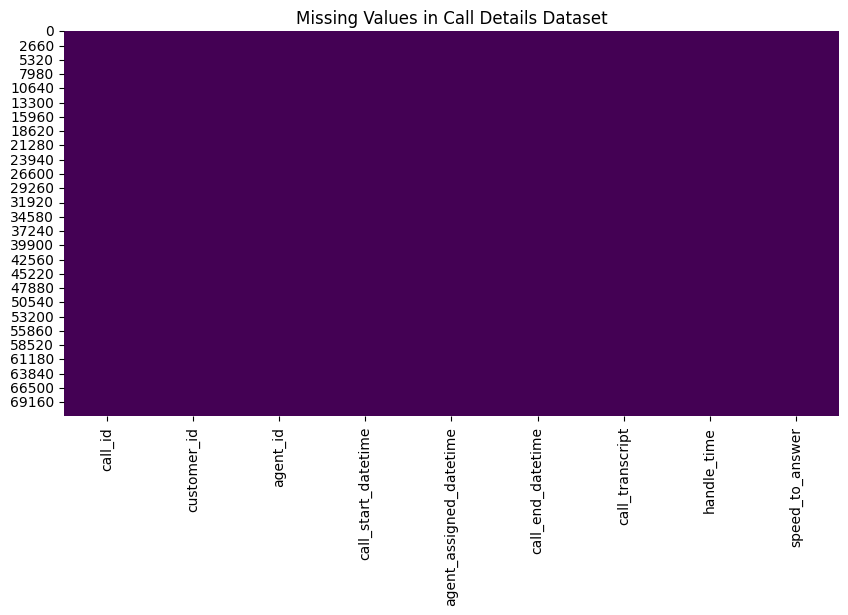

In [ ]:
# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(call_reason.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Call Reason Dataset')
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(call_details.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Call Details Dataset')
plt.show()


AHT Calculation:

In [ ]:
# Calculate AHT
call_details['AHT'] = (call_details['call_end_datetime'] - call_details['call_start_datetime']).dt.total_seconds() / 60  # in minutes

AST Calculation: Assuming you have a column for queue time or similar, calculate AST similarly.


In [ ]:
# Calculate AST
call_details['waiting_time'] = (call_details['agent_assigned_datetime'] - call_details['call_start_datetime']).dt.total_seconds() / 60  # in minutes


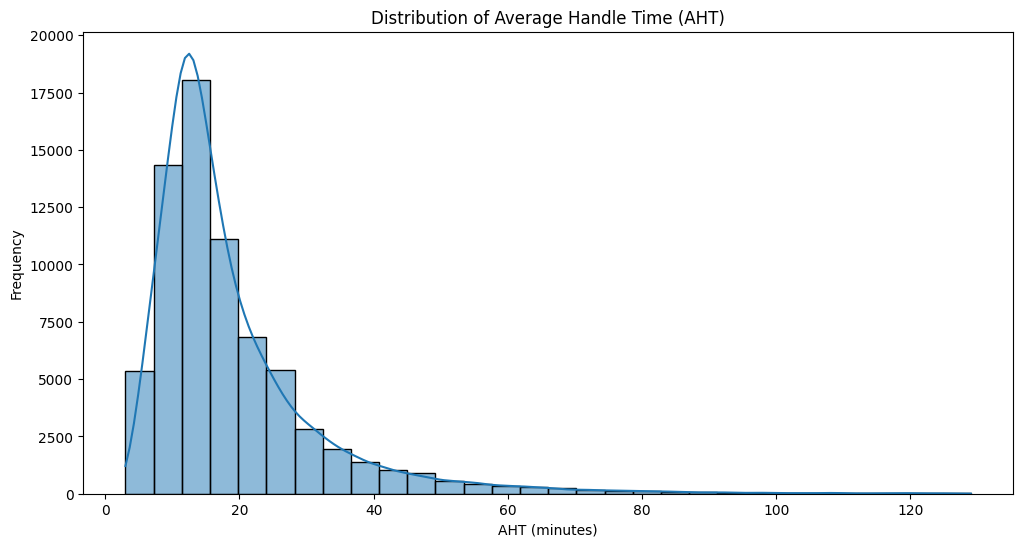

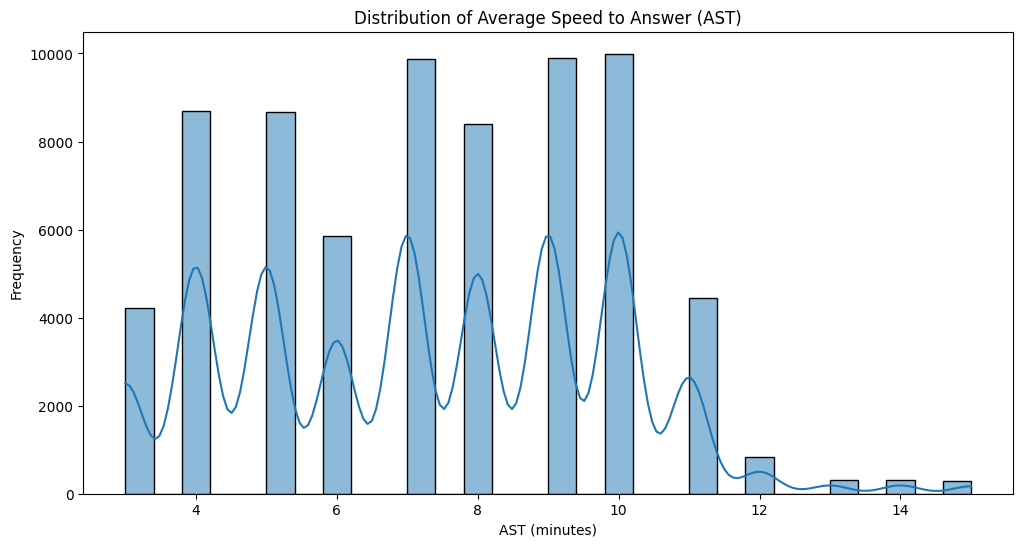

In [ ]:
# Plotting AHT
plt.figure(figsize=(12, 6))
sns.histplot(call_details['AHT'], bins=30, kde=True)
plt.title('Distribution of Average Handle Time (AHT)')
plt.xlabel('AHT (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plotting AST
plt.figure(figsize=(12, 6))
sns.histplot(call_details['waiting_time'], bins=30, kde=True)
plt.title('Distribution of Average Speed to Answer (AST)')
plt.xlabel('AST (minutes)')
plt.ylabel('Frequency')
plt.show()


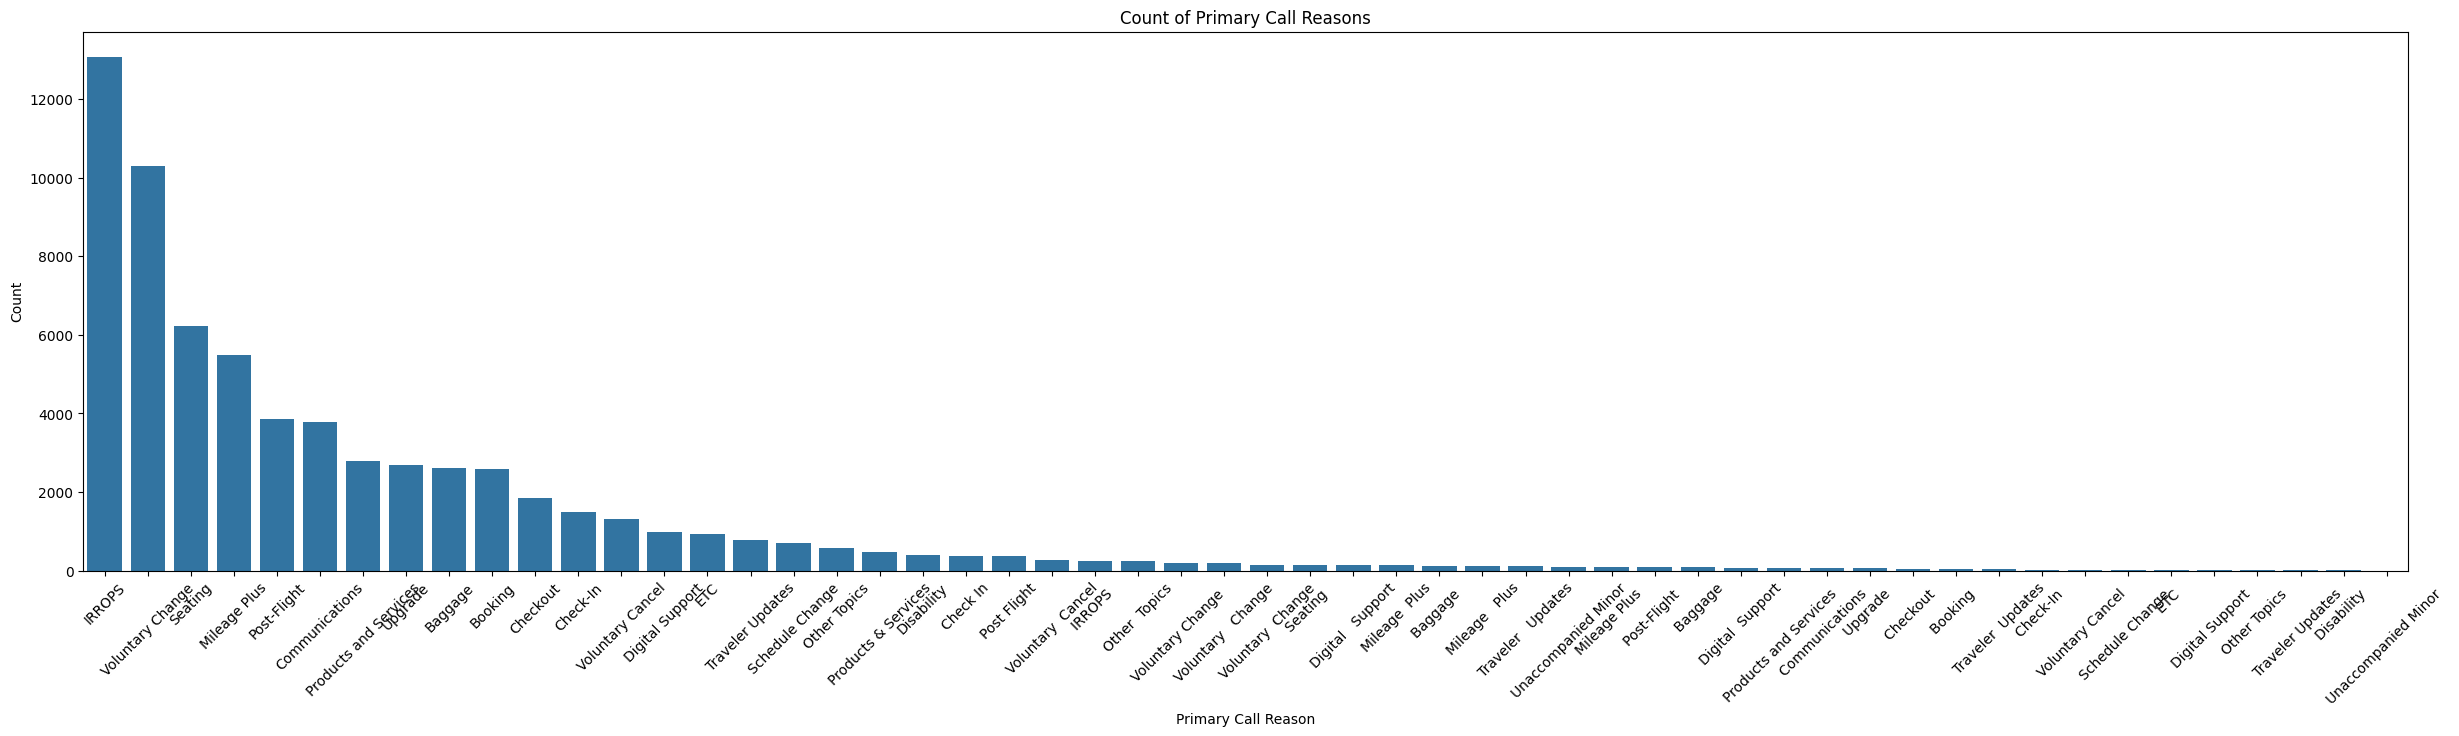

In [ ]:
# Count of call reasons
call_reason_counts = call_reason['primary_call_reason'].value_counts()

# Plotting call reason counts
plt.figure(figsize=(30, 7))
sns.barplot(x=call_reason_counts.index, y=call_reason_counts.values)
plt.title('Count of Primary Call Reasons')
plt.xticks(rotation=45)
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


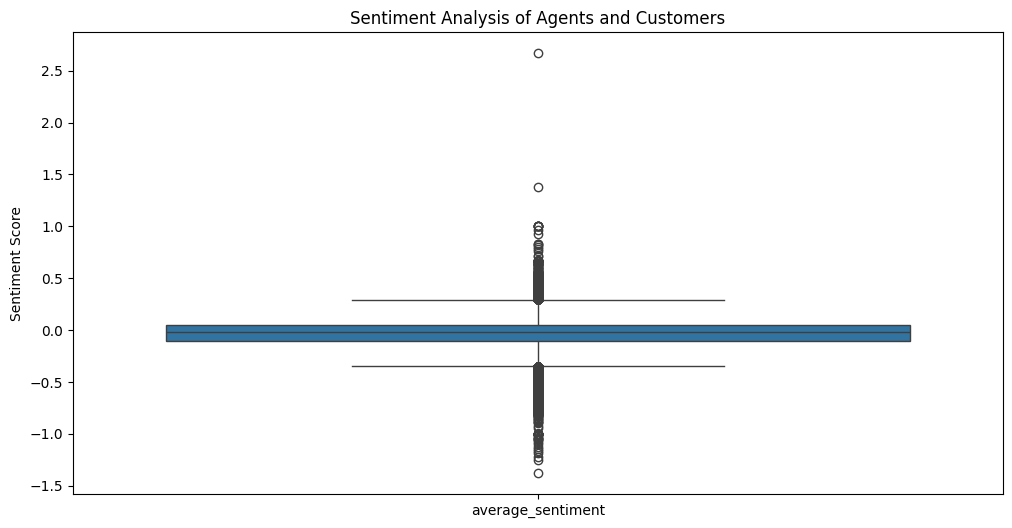

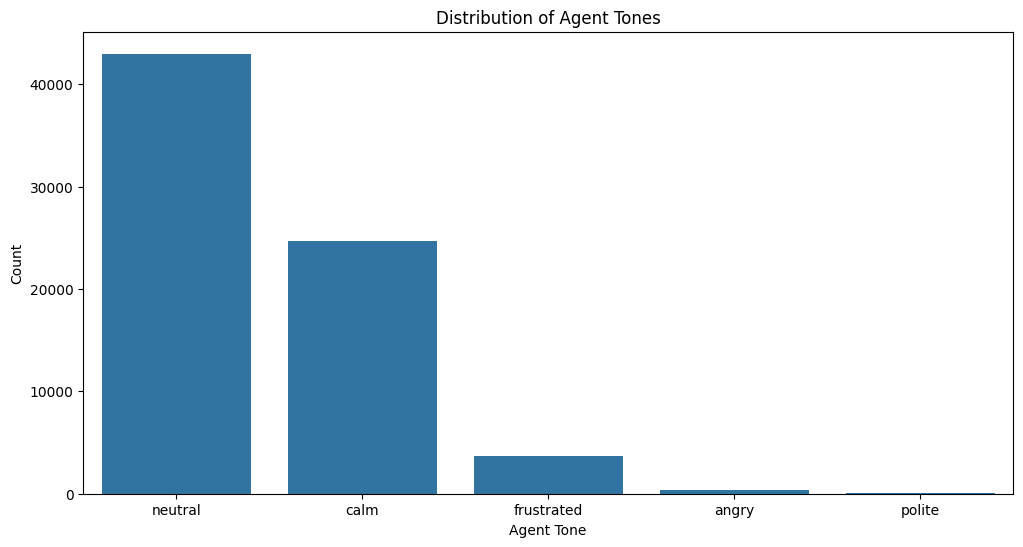

In [ ]:
# Plotting agent and customer sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=sentiment[['average_sentiment', 'agent_tone', 'customer_tone']])
plt.title('Sentiment Analysis of Agents and Customers')
plt.ylabel('Sentiment Score')
plt.show()

# Count of agent tones
agent_tone_counts = sentiment['agent_tone'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=agent_tone_counts.index, y=agent_tone_counts.values)
plt.title('Distribution of Agent Tones')
plt.xlabel('Agent Tone')
plt.ylabel('Count')
plt.show()

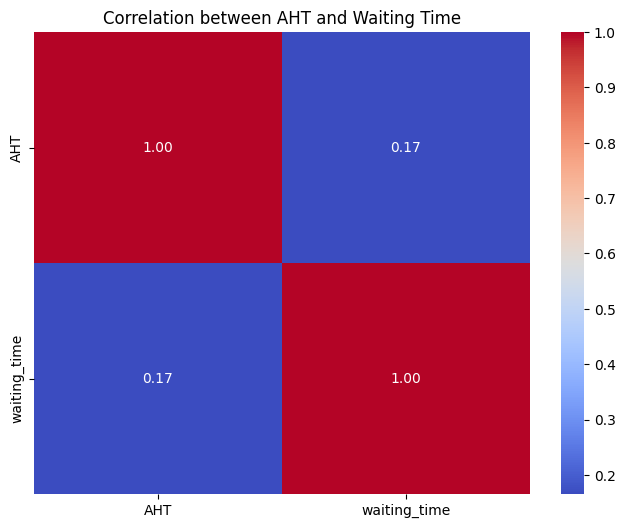

In [ ]:
# Correlation matrix
correlation_matrix = call_details[['AHT', 'waiting_time']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between AHT and Waiting Time')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


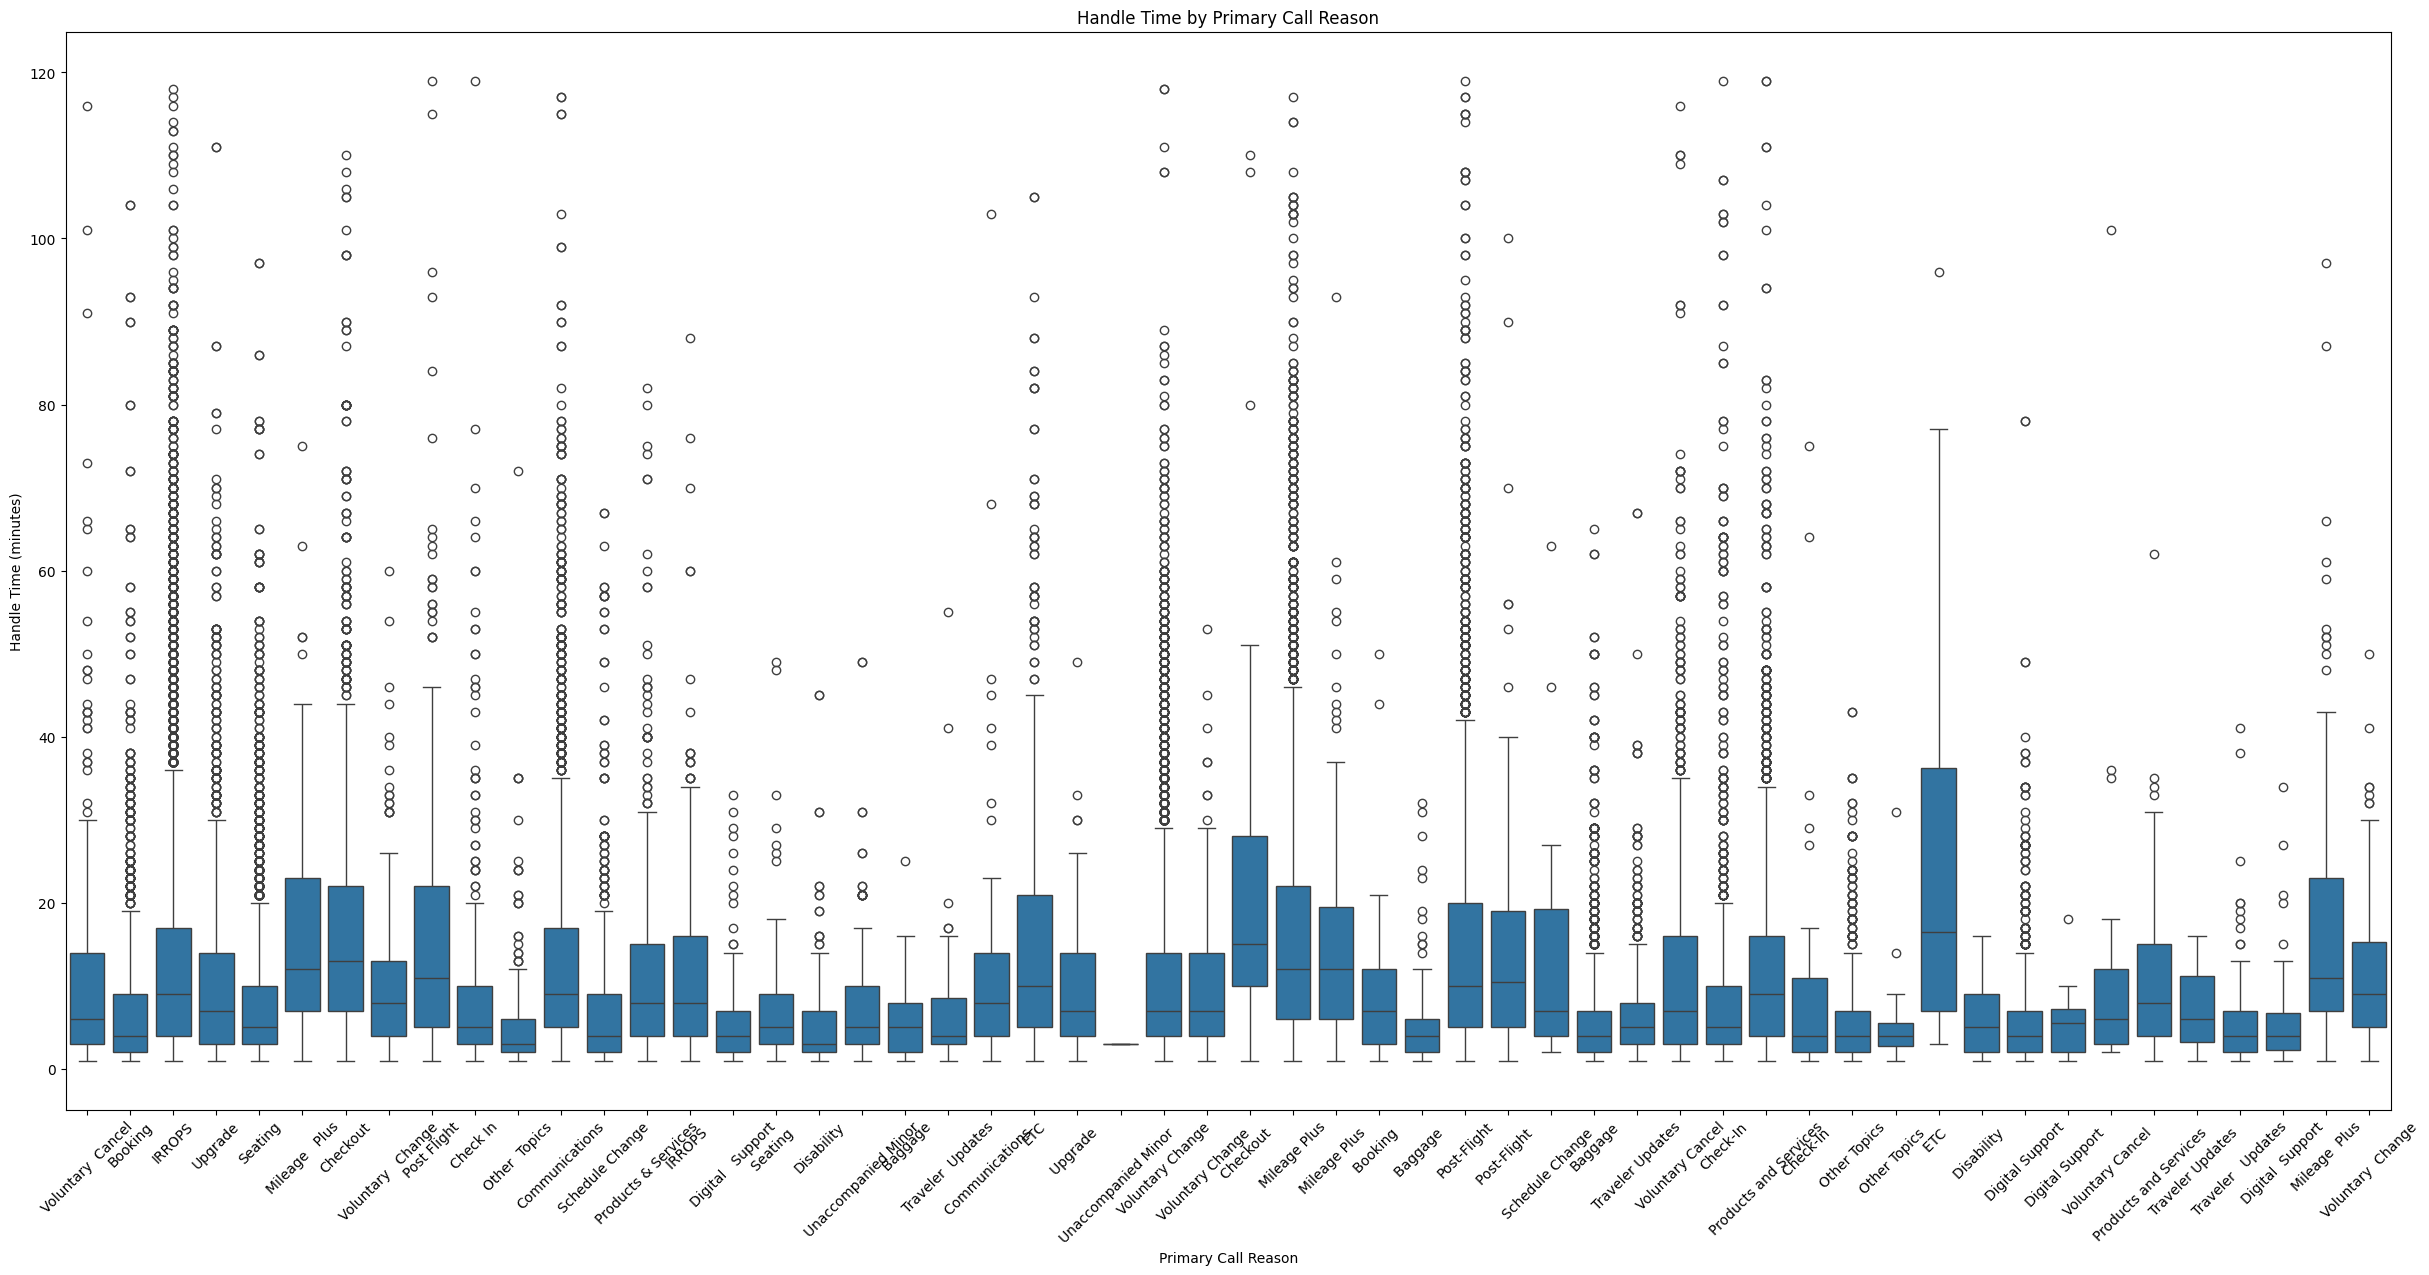

In [ ]:
plt.figure(figsize=(30, 14))
sns.boxplot(data=merged_data, x='primary_call_reason', y='handle_time')
plt.title('Handle Time by Primary Call Reason')
plt.xticks(rotation=45)
plt.xlabel('Primary Call Reason')
plt.ylabel('Handle Time (minutes)')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


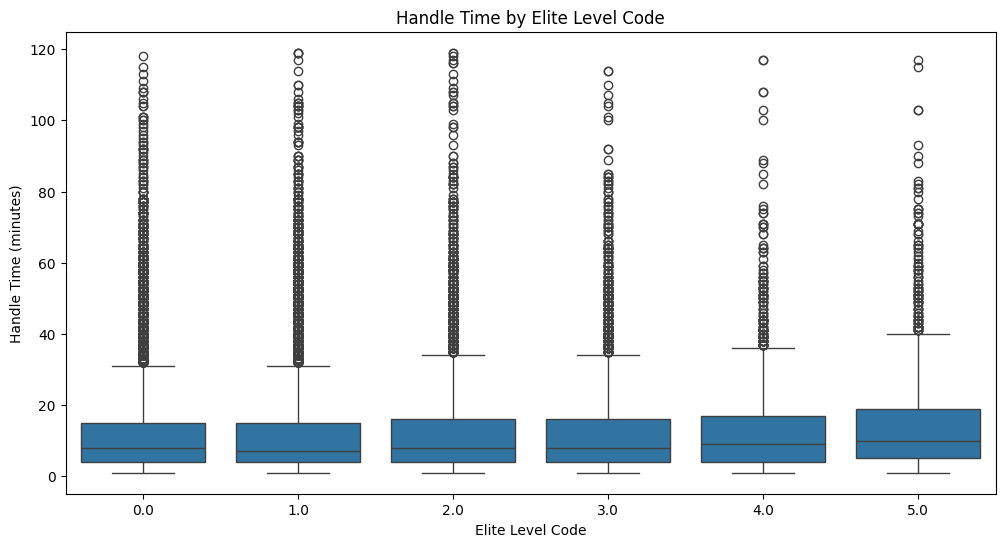

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


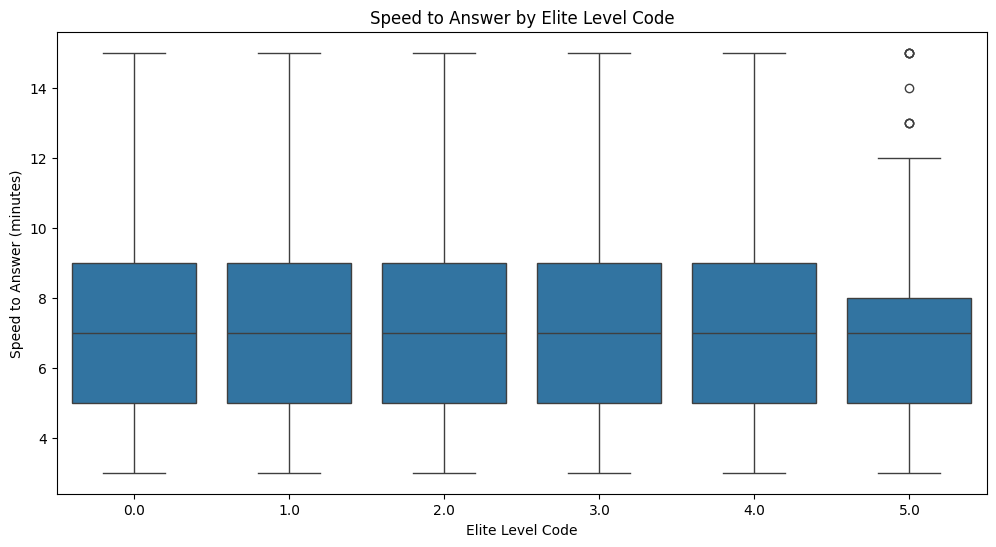

In [ ]:
# Handle Time by Elite Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='elite_level_code', y='handle_time')
plt.title('Handle Time by Elite Level Code')
plt.xlabel('Elite Level Code')
plt.ylabel('Handle Time (minutes)')
plt.show()

# Speed to Answer by Elite Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='elite_level_code', y='speed_to_answer')
plt.title('Speed to Answer by Elite Level Code')
plt.xlabel('Elite Level Code')
plt.ylabel('Speed to Answer (minutes)')
plt.show()

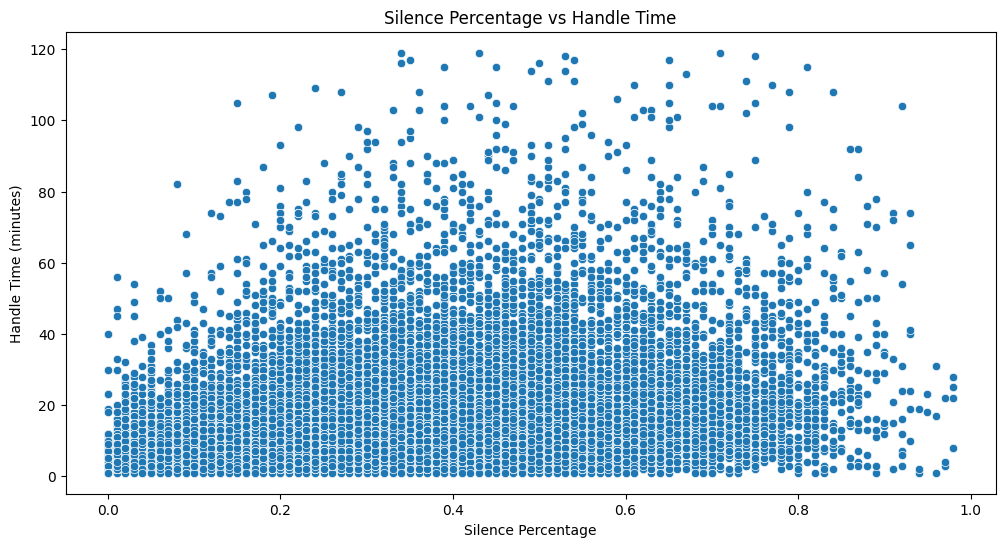

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='silence_percent_average', y='handle_time')
plt.title('Silence Percentage vs Handle Time')
plt.xlabel('Silence Percentage')
plt.ylabel('Handle Time (minutes)')
plt.show()

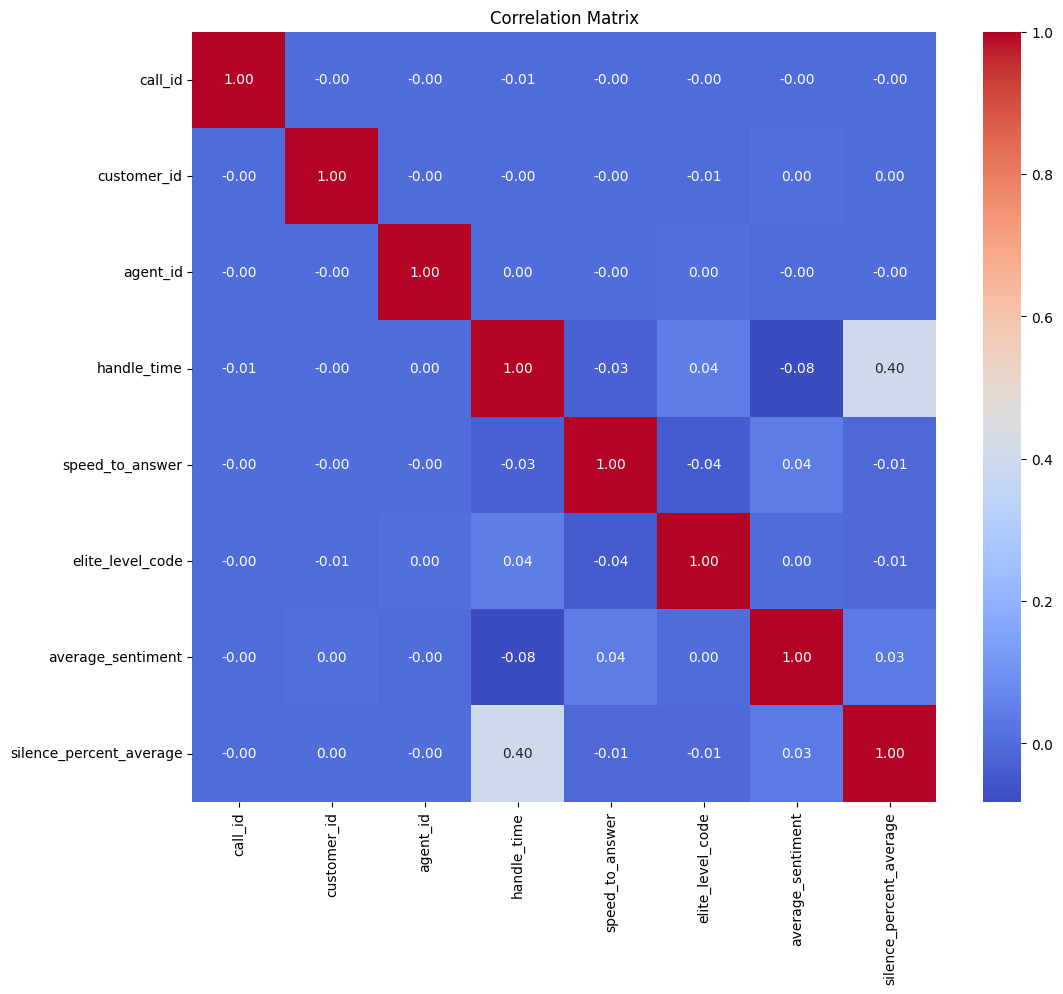

In [ ]:
# Correlation matrix
# Exclude columns with non-numeric data from correlation calculation
numeric_merged_data = merged_data.select_dtypes(include=['number'])
correlation_matrix = numeric_merged_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

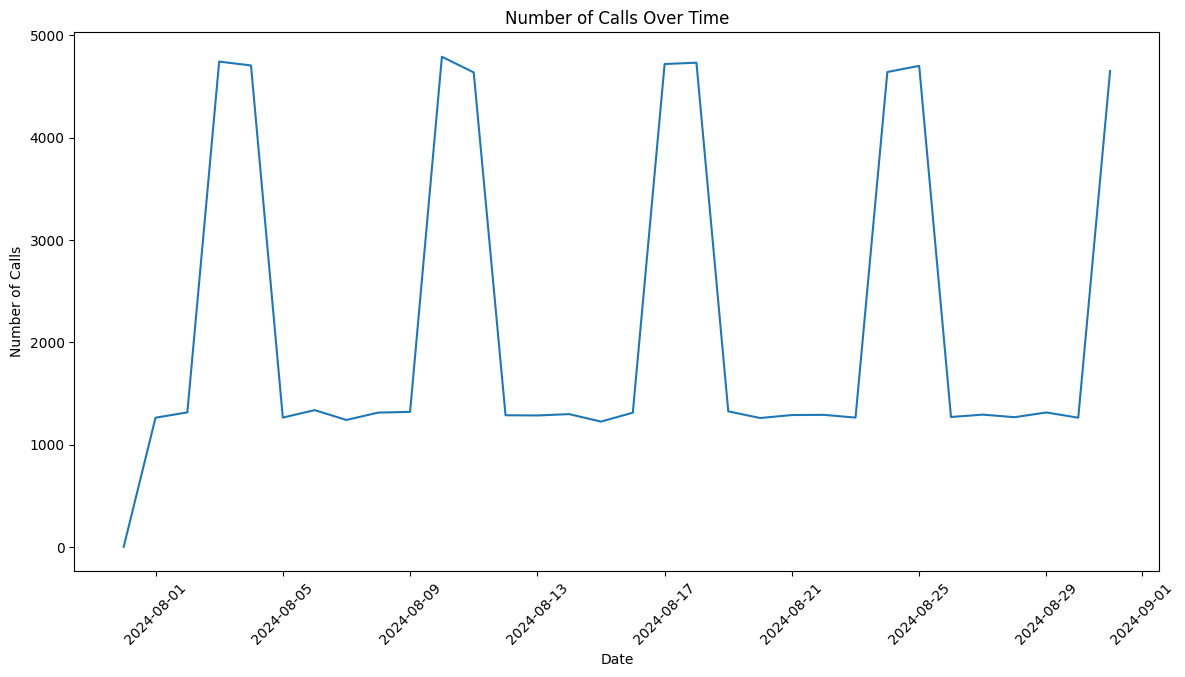

In [ ]:
# Extracting date features for analysis
merged_data['call_date'] = merged_data['call_start_datetime'].dt.date

# Count of calls by date
calls_by_date = merged_data['call_date'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x=calls_by_date.index, y=calls_by_date.values)
plt.title('Number of Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()


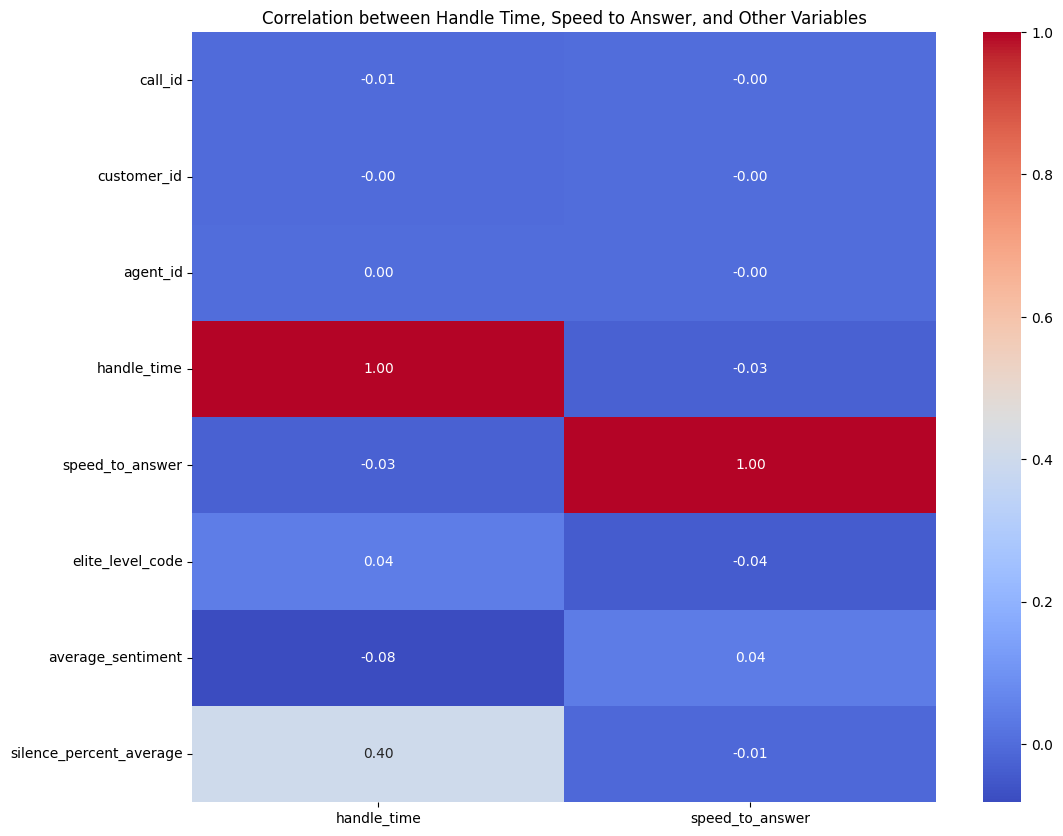

In [ ]:
# Calculate the correlation matrix
numeric_merged_data = merged_data.select_dtypes(include=['number'])
correlation_matrix = numeric_merged_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['handle_time', 'speed_to_answer']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Handle Time, Speed to Answer, and Other Variables')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


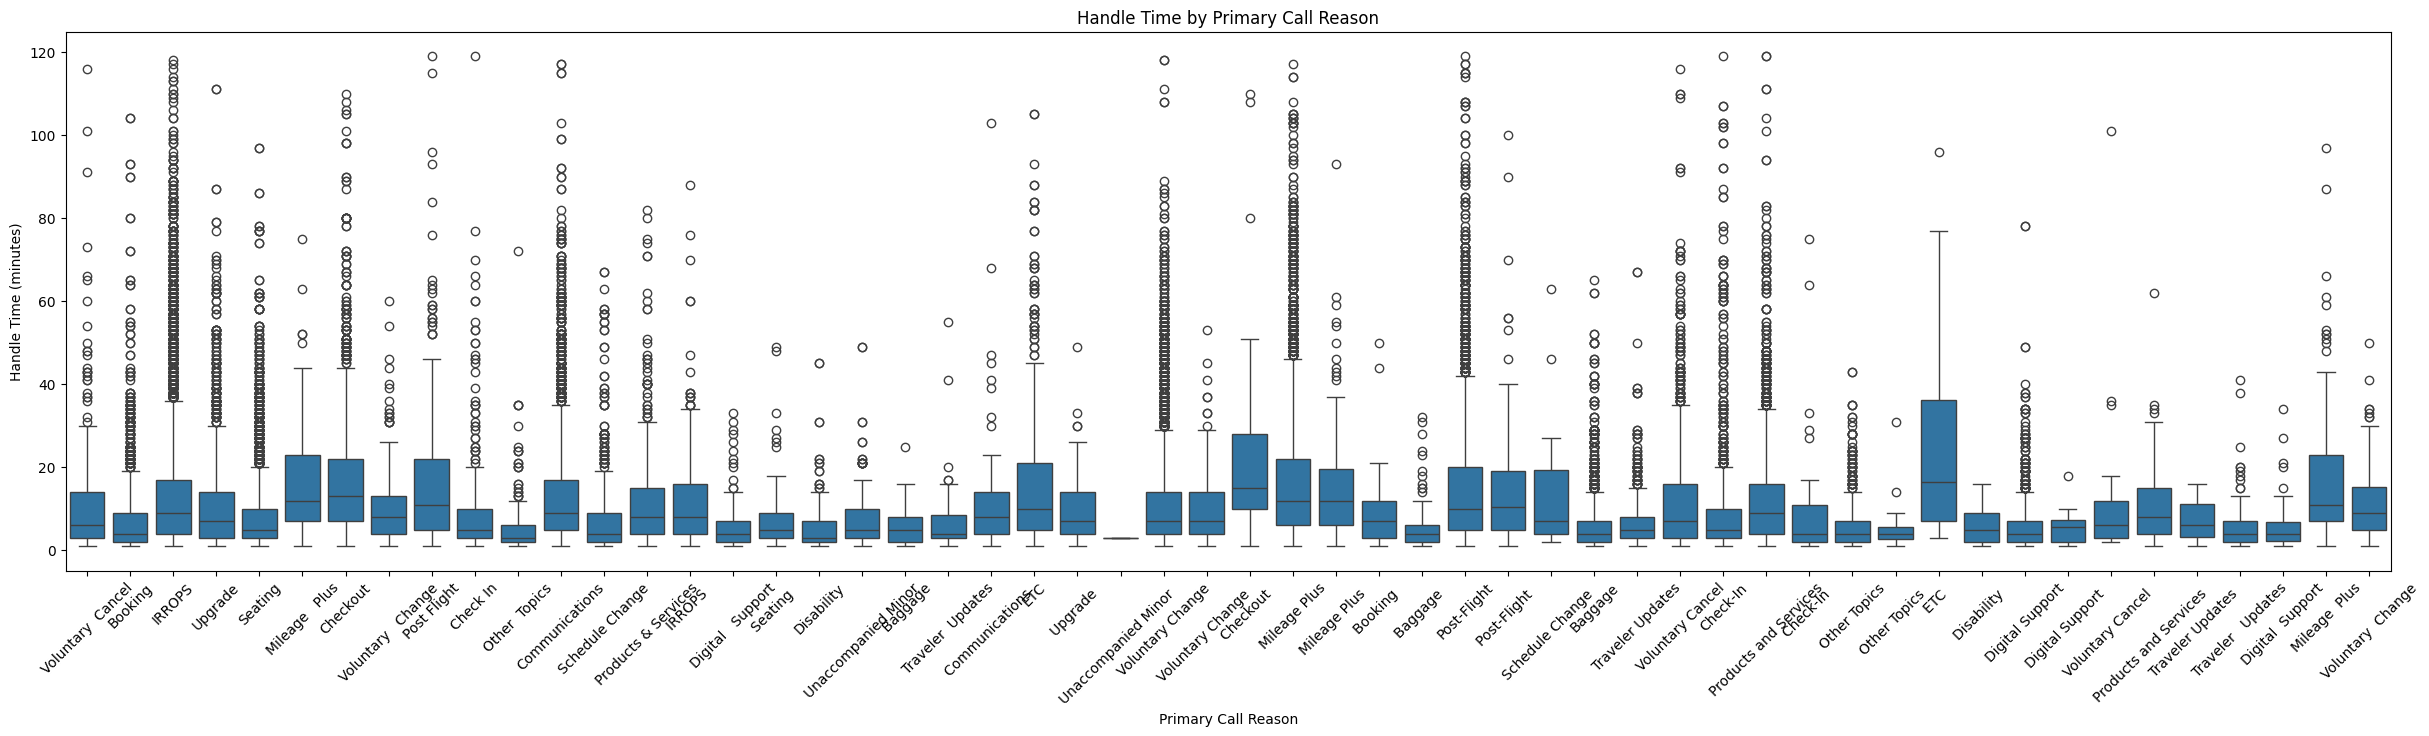

In [ ]:
plt.figure(figsize=(30, 7))
sns.boxplot(data=merged_data, x='primary_call_reason', y='handle_time')
plt.title('Handle Time by Primary Call Reason')
plt.xticks(rotation=45)
plt.xlabel('Primary Call Reason')
plt.ylabel('Handle Time (minutes)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


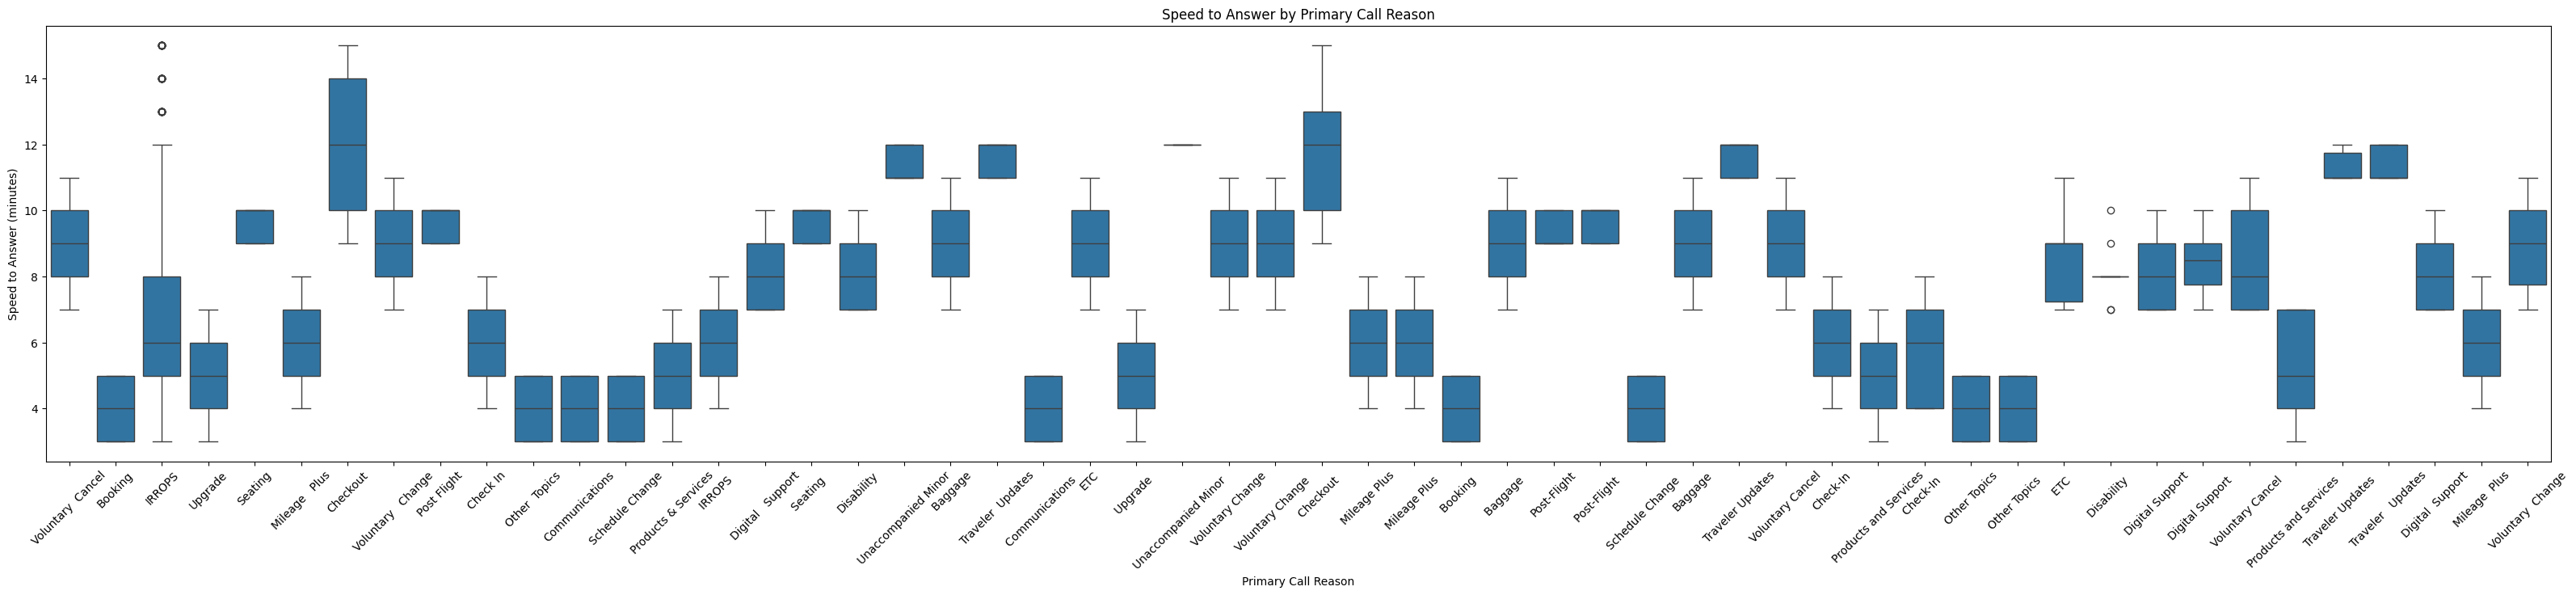

In [ ]:
plt.figure(figsize=(40, 7))
sns.boxplot(data=merged_data, x='primary_call_reason', y='speed_to_answer')
plt.title('Speed to Answer by Primary Call Reason')
plt.xticks(rotation=45)
plt.xlabel('Primary Call Reason')
plt.ylabel('Speed to Answer (minutes)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


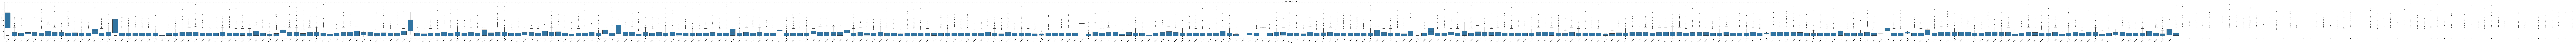

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


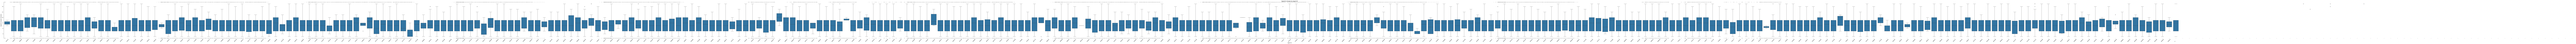

In [ ]:
# AHT by Agent
plt.figure(figsize=(500, 7))
sns.boxplot(data=merged_data, x='agent_id', y='handle_time')
plt.title('Handle Time by Agent ID')
plt.xticks(rotation=45)
plt.xlabel('Agent ID')
plt.ylabel('Handle Time (minutes)')
plt.show()

# AST by Agent
plt.figure(figsize=(500, 7))
sns.boxplot(data=merged_data, x='agent_id', y='speed_to_answer')
plt.title('Speed to Answer by Agent ID')
plt.xticks(rotation=45)
plt.xlabel('Agent ID')
plt.ylabel('Speed to Answer (minutes)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


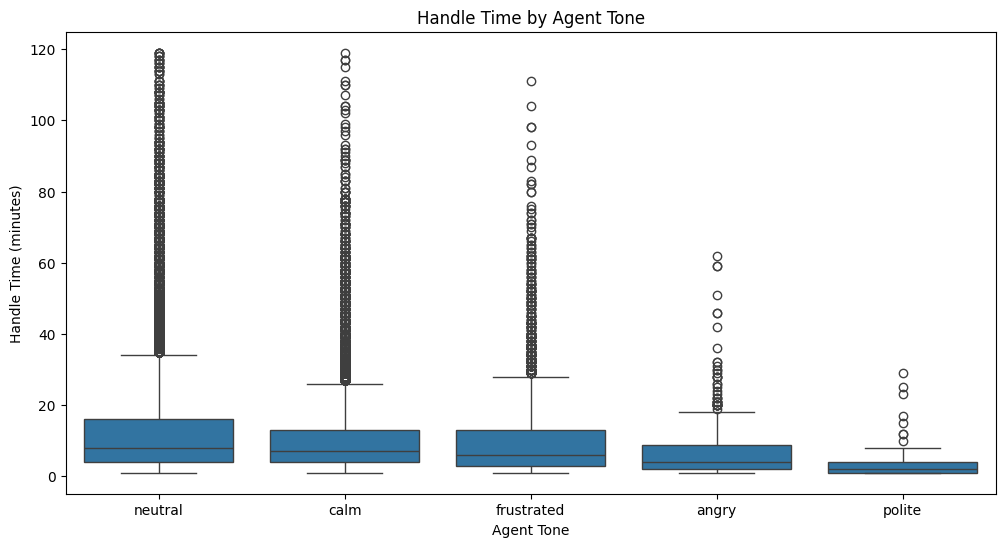

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


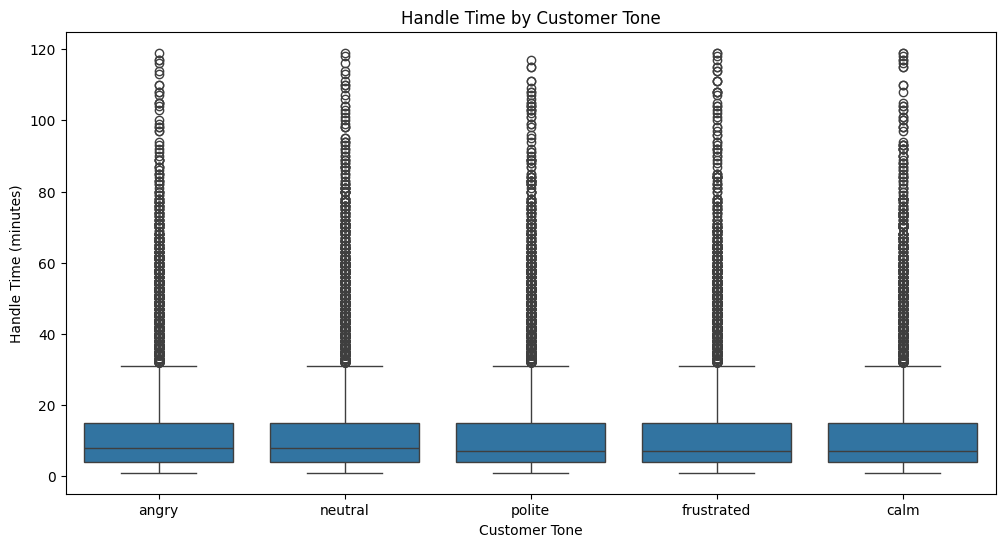

In [ ]:
# AHT by Agent Tone
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='agent_tone', y='handle_time')
plt.title('Handle Time by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Handle Time (minutes)')
plt.show()

# AHT by Customer Tone
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='customer_tone', y='handle_time')
plt.title('Handle Time by Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Handle Time (minutes)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


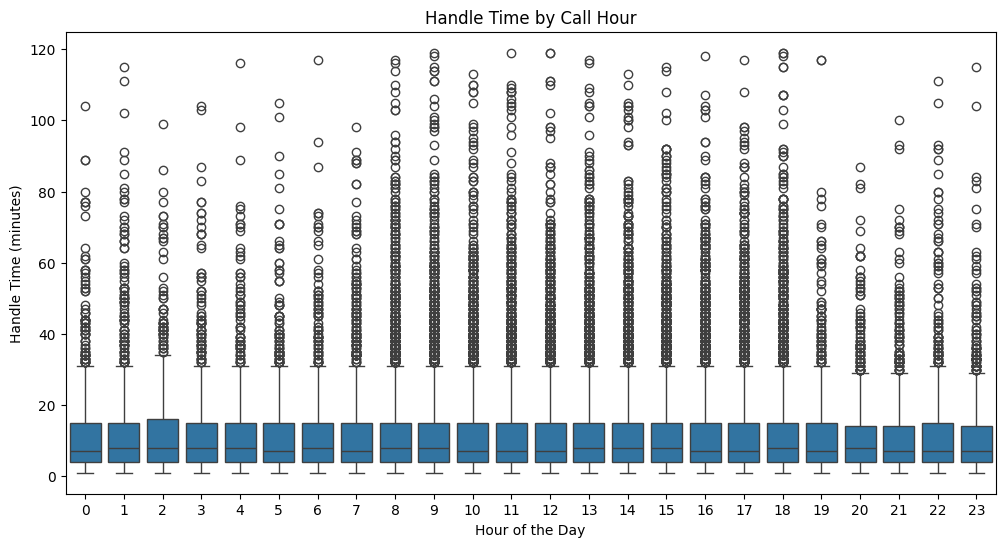

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


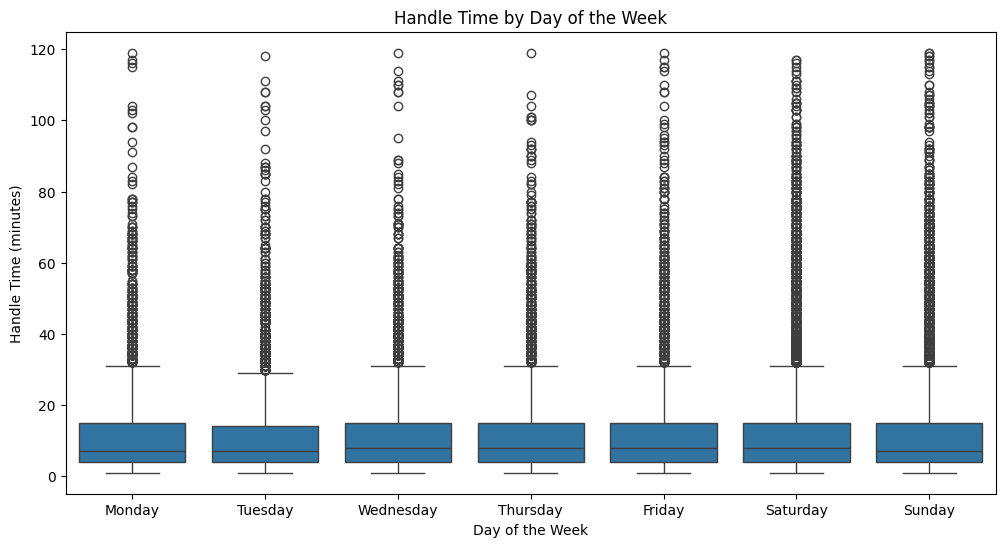

In [ ]:
# Extract hour and day of the week from the call_start_datetime
merged_data['call_hour'] = merged_data['call_start_datetime'].dt.hour
merged_data['call_day'] = merged_data['call_start_datetime'].dt.day_name()

# AHT by Call Hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='call_hour', y='handle_time')
plt.title('Handle Time by Call Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Handle Time (minutes)')
plt.show()

# AHT by Call Day
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='call_day', y='handle_time', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Handle Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Handle Time (minutes)')
plt.show()


In [ ]:
import scipy.stats as stats

# Example: ANOVA for Handle Time by Agent Tone
anova_result = stats.f_oneway(
    merged_data[merged_data['agent_tone'] == 'neutral']['handle_time'],
    merged_data[merged_data['agent_tone'] == 'angry']['handle_time'],
    merged_data[merged_data['agent_tone'] == 'happy']['handle_time']
)

print('ANOVA Result for Handle Time by Agent Tone:', anova_result)


ANOVA Result for Handle Time by Agent Tone: F_onewayResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


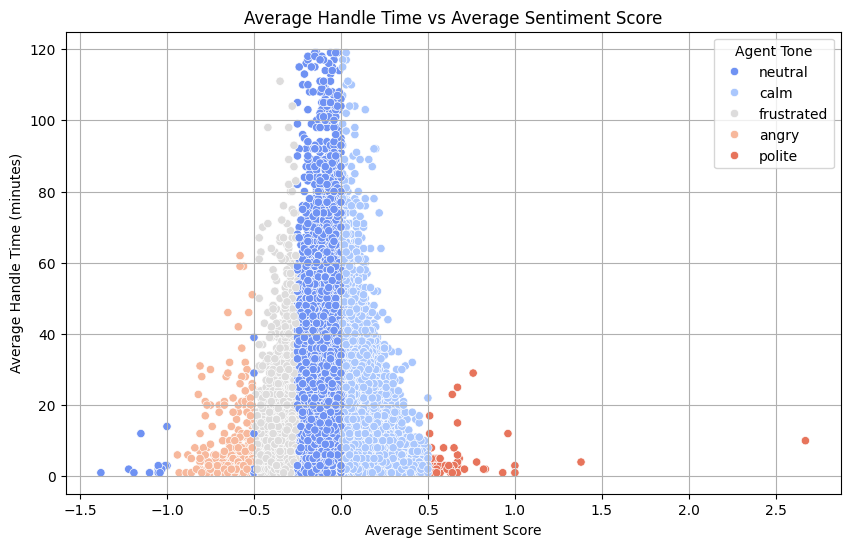

In [ ]:
# Plotting Average Handle Time (AHT) vs Average Sentiment Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='average_sentiment', y='handle_time', hue='agent_tone', palette='coolwarm')
plt.title('Average Handle Time vs Average Sentiment Score')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Average Handle Time (minutes)')
plt.legend(title='Agent Tone')
plt.grid(True)
plt.show()
